In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
path=r"delivery_time.csv"
df1=pd.read_csv(path)
df1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df1.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [4]:
df1.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [5]:
df1.rename({'Delivery Time':'Delivery','Sorting Time':'Sorting'},axis=1,inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delivery', ylabel='Sorting'>

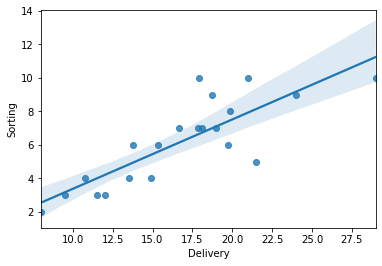

In [6]:
sns.regplot(df1['Delivery'],df1['Sorting'])

In [7]:
df1

,Delivery,Sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [8]:
df1.columns

Index(['Delivery', 'Sorting'], dtype='object')

In [9]:
model=smf.ols('Delivery~Sorting',data=df1).fit()

In [10]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Delivery   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           3.98e-06
Time:                        12:28:12   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.0

In [11]:
print(model.rsquared,'\n',model.rsquared_adj)

0.6822714748417231 
 0.6655489208860244


In [12]:
print(model.pvalues,'\n',model.tvalues)

Intercept    0.001147
Sorting      0.000004
dtype: float64 
 Intercept    3.823349
Sorting      6.387447
dtype: float64


In [13]:
print(model.params)

Intercept    6.582734
Sorting      1.649020
dtype: float64


In [14]:
model.predict(df1['Sorting'])

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

# Predicting Sorting value at zero index

In [15]:
6.582734+1.649020*(10)

23.072933999999997

In [16]:
Delivery_log=np.log(df1['Delivery'])

In [17]:
Sorting_log=np.log(df1['Sorting'])

In [18]:
print(Delivery_log)
print(Sorting_log)

0     3.044522
1     2.602690
2     2.983153
3     3.178054
4     3.367296
5     2.731115
6     2.944439
7     2.251292
8     2.884801
9     2.931194
10    2.987196
11    2.374906
12    2.814210
13    2.442347
14    2.487404
15    2.700018
16    2.621039
17    2.896464
18    2.079442
19    2.880882
20    3.068053
Name: Delivery, dtype: float64
0     2.302585
1     1.386294
2     1.791759
3     2.197225
4     2.302585
5     1.791759
6     1.945910
7     1.098612
8     2.302585
9     2.197225
10    2.079442
11    1.386294
12    1.945910
13    1.098612
14    1.098612
15    1.386294
16    1.791759
17    1.945910
18    0.693147
19    1.945910
20    1.609438
Name: Sorting, dtype: float64


In [19]:
model=smf.ols('Delivery_log~Sorting',data=df1).fit()

In [20]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Delivery_log   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           1.59e-06
Time:                        12:28:12   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.0

In [21]:
print(model.rsquared,'\n',model.rsquared_adj)

0.7109478980584187 
 0.6957346295351776


In [22]:
print(model.pvalues,'\n',model.tvalues)

Intercept    1.857343e-14
Sorting      1.592708e-06
dtype: float64 
 Intercept    20.601357
Sorting       6.836088
dtype: float64


In [23]:
print(model.params)

Intercept    2.121372
Sorting      0.105552
dtype: float64


In [24]:
model=smf.ols('Delivery~Sorting_log',data=df1).fit()

In [25]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Delivery   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           2.64e-06
Time:                        12:28:12   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1597      2.455      0.472      

In [26]:
print(model.params)

Intercept      1.159684
Sorting_log    9.043413
dtype: float64


In [27]:
print(model.rsquared,'\n',model.rsquared_adj)

0.6954434611324223 
 0.6794141696130761


In [28]:
print(model.pvalues,'\n',model.tvalues)

Intercept      0.641980
Sorting_log    0.000003
dtype: float64 
 Intercept      0.472460
Sorting_log    6.586789
dtype: float64


In [29]:
model=smf.ols('Delivery_log~Sorting_log',data=df1).fit()

In [30]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Delivery_log   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           1.60e-07
Time:                        12:28:12   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.7420      0.133     13.086      

In [31]:
print(model.params)

Intercept      1.741987
Sorting_log    0.597522
dtype: float64


In [32]:
print(model.rsquared,'\n',model.rsquared_adj)

0.77216134926874 
 0.7601698413355158


In [33]:
print(model.pvalues,'\n',model.tvalues)

Intercept      5.921137e-11
Sorting_log    1.601539e-07
dtype: float64 
 Intercept      13.085552
Sorting_log     8.024484
dtype: float64


In [34]:
Delivery_Sqrt=np.sqrt(df1['Delivery'])

In [35]:
Sorting_Sqrt=np.sqrt(df1['Sorting'])

In [36]:
Delivery_Sqrt

0     4.582576
1     3.674235
2     4.444097
3     4.898979
4     5.385165
5     3.917908
6     4.358899
7     3.082207
8     4.230839
9     4.330127
10    4.453089
11    3.278719
12    4.084116
13    3.391165
14    3.468429
15    3.857460
16    3.708099
17    4.255585
18    2.828427
19    4.222558
20    4.636809
Name: Delivery, dtype: float64

In [37]:
Sorting_Sqrt

0     3.162278
1     2.000000
2     2.449490
3     3.000000
4     3.162278
5     2.449490
6     2.645751
7     1.732051
8     3.162278
9     3.000000
10    2.828427
11    2.000000
12    2.645751
13    1.732051
14    1.732051
15    2.000000
16    2.449490
17    2.645751
18    1.414214
19    2.645751
20    2.236068
Name: Sorting, dtype: float64

In [38]:
model=smf.ols('Delivery_Sqrt~Sorting',data=df1).fit()

In [39]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Delivery_Sqrt   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           2.00e-06
Time:                        12:28:12   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7727      0.205     13.527      0.0

In [40]:
print(model.rsquared,'\n',model.rsquared_adj)

0.704049871541756 
 0.6884735489913221


In [41]:
print(model.params)

Intercept    2.772731
Sorting      0.206632
dtype: float64


In [42]:
print(model.pvalues,'\n',model.tvalues)

Intercept    3.339366e-11
Sorting      2.001215e-06
dtype: float64 
 Intercept    13.527452
Sorting       6.723095
dtype: float64


In [43]:
model=smf.ols('Delivery~Sorting_Sqrt',data=df1).fit()

In [44]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Delivery   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           2.61e-06
Time:                        12:28:13   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.5188      2.995     -0.841   

In [45]:
print(model.params)

Intercept      -2.518837
Sorting_Sqrt    7.936591
dtype: float64


In [46]:
print(model.rsquared,'\n',model.rsquared_adj)

0.6958062276308671 
 0.6797960290851233


In [47]:
print(model.pvalues,'\n',model.tvalues)

Intercept       0.410857
Sorting_Sqrt    0.000003
dtype: float64 
 Intercept      -0.840911
Sorting_Sqrt    6.592434
dtype: float64


In [48]:
model=smf.ols('Delivery_Sqrt~Sorting_Sqrt',data=df1).fit()

In [49]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Delivery_Sqrt   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           8.48e-07
Time:                        12:28:13   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.6135      0.349      4.628   

In [50]:
print(model.params)

Intercept       1.613479
Sorting_Sqrt    1.002217
dtype: float64


In [51]:
print(model.rsquared,'\n',model.rsquared_adj)

0.7292011987544664 
 0.7149486302678594


In [52]:
print(model.pvalues,'\n',model.tvalues)

Intercept       1.833621e-04
Sorting_Sqrt    8.475706e-07
dtype: float64 
 Intercept       4.628248
Sorting_Sqrt    7.152817
dtype: float64
